# Análisis 4: Comparación de características entre grupos

## 1. Comparar diferentes características de HRV (por ejemplo, SDNN, RMSSD o LF/HF) obtenidas en el Análisis 3

In [7]:
import pandas as pd

# Cargar el archivo de características de HRV calculadas
archivo = './Data/DatosFinalNk2.xlsx'
df = pd.read_excel(archivo)

# Mostrar las primeras filas para ver cómo está estructurado
df.head()


,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,...,QRSCount,QOnset,QOffset,TOffset,AgeGroup,SDNN,RMSSD,LFHF_NeuroKit,LFHF_NumPy,R_Peaks
0,MUSE_20180712_160452_75000,AFIB,LVH,74,MALE,49,57,92,488,440,...,7,221,267,465,61-80,NaN,NaN,NaN,NaN,[ 546 1147 1659 1931 2494 3109 3732 4188 4797]
1,MUSE_20180118_131905_87000,AFIB,TWC,72,MALE,151,170,84,298,472,...,25,210,252,359,61-80,47.066012,64.286291,NaN,NaN,[ 256 443 685 905 1146 1335 1524 1763 1970 ...
2,MUSE_20180114_071444_05000,AFIB,TWC,74,MALE,107,108,82,342,456,...,18,216,257,387,61-80,107.932618,182.181594,NaN,NaN,[ 296 568 861 1263 1511 1845 2101 2429 2657 ...
3,MUSE_20180114_132956_24000,AFIB,LVHV TWC,68,MALE,95,87,84,334,419,...,16,228,270,395,61-80,122.117670,155.869768,NaN,NaN,[ 531 838 1200 1515 1852 2238 2531 2774 3000 ...
4,MUSE_20180118_124852_18000,AFIB,STTU,78,MALE,97,153,104,344,436,...,16,221,273,393,61-80,72.790109,87.143560,NaN,NaN,[ 302 583 907 1154 1445 1755 2059 2368 2645 ...


### Comparación 1: SDNN (Desviación estandar de los intervalos entre latidos RR normales)
Ésta comparación mire la variabilidad global de la frecuencia cardiaca. Captura todas las fluctiaciones del ritmo cardiaco, tando como cambios lentos (como dormir), así como cambios rápidos (como estar estresado). Un SDNN muy bajo puede indicar estrés ó enfermedad.

Resumen SDNN por grupo:
              mean        std
Rhythm                       
AF       68.441106  63.353489
AFIB    119.549979  43.699818
AT       77.684363  71.225074
SA       72.833422  29.433099
SB      236.060879  78.128803
SR       22.505792  30.860664
ST       14.622280  29.638311
SVT      10.913614  33.003704


<Figure size 800x500 with 0 Axes>

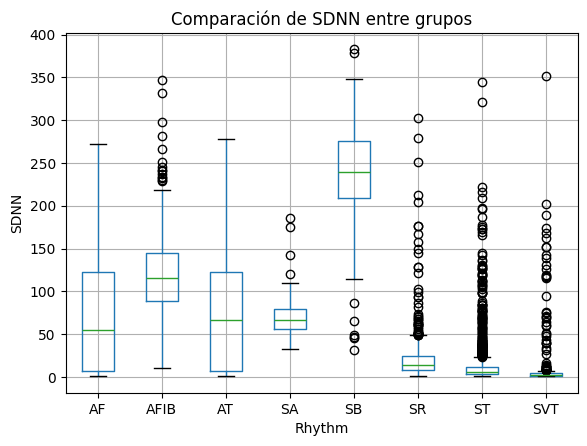

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Definir la característica a analizar
caracteristica = 'SDNN'

# Calcular media y desviación estándar por grupo
resumen_sdnn = df.groupby('Rhythm')[caracteristica].agg(['mean', 'std'])
print("Resumen SDNN por grupo:")
print(resumen_sdnn)

# Graficar
plt.figure(figsize=(8,5))
df.boxplot(column=caracteristica, by='Rhythm')
plt.title(f'Comparación de {caracteristica} entre grupos')
plt.suptitle('')
plt.xlabel('Rhythm')
plt.ylabel(caracteristica)
plt.grid(True)
plt.show()


La variabilidad de la frecuencia cardíaca medida a través de SDNN muestra diferencias claras entre los ritmos cardíacos. La bradicardia sinusal (SB) presentó los valores más altos de SDNN, mientras que los ritmos rápidos como ST y SVT mostraron las menores variabilidades. En ritmos normales (SR), aunque la mediana de SDNN es baja, se observa una dispersión significativa con algunos pacientes mostrando alta variabilidad, consistente con la variabilidad fisiológica normal.

En la comparación del SDNN entre los grupos podemos ver que:
AF y AT tienen una mediana algo baja (más o menos 50-70%), y son bastante variables, con muchas diferencias entre pacientes.
AFIB muestra una mediana más alta que AF y AT, además de una variabilidad grande entre los pacientes.
SA muestra valores de SDNN más vajos, indicando que los valores están más agrupados.
SB muestra una mediana más alta, su mediana es bastante elevada, es quien tiene mayor SDNN de todos los grupos de pacientes.
SR (ritmo sinusal normal) tiene una mediana baja pero muchos valores atípicos, indicando que personas sanas pueden tener variabilidad diversa.
ST y SVT (taquicardias) muestran un SDNN muy bajo, con muchos valores atípicos, mostrando mucha variabilidad entre pacientes.

### Comparación 2: RMSSD (Raíz cuadrada de la media de las diferencias sucesivas entre intervalos RR)
Mide la variabilidad a corto plazo de los latidos cardiacos, no mira cambios lentos o a corto plazo como SDNN, sino que mira cómo cambia el latido de un latido a otro (como la respiración). Un RMSSD muy bajo puede indicar estrés, fatiga ó enfermedad.

Resumen RMSSD por grupo:
              mean         std
Rhythm                        
AF       93.438305   88.297824
AFIB    162.575638   65.421847
AT      105.001802  103.529605
SA       72.519079   46.649850
SB      371.676431  126.039218
SR       24.170705   42.835322
ST       17.542498   43.949764
SVT      12.934841   44.122263


<Figure size 800x500 with 0 Axes>

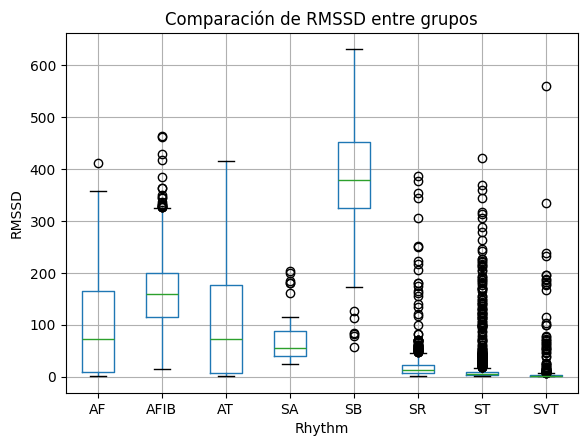

In [15]:
# Definir la característica a analizar
caracteristica = 'RMSSD'

# Calcular media y desviación estándar por grupo
resumen_rmssd = df.groupby('Rhythm')[caracteristica].agg(['mean', 'std'])
print("Resumen RMSSD por grupo:")
print(resumen_rmssd)

# Graficar
plt.figure(figsize=(8,5))
df.boxplot(column=caracteristica, by='Rhythm')
plt.title(f'Comparación de {caracteristica} entre grupos')
plt.suptitle('')
plt.xlabel('Rhythm')
plt.ylabel(caracteristica)
plt.grid(True)
plt.show()


El análisis de RMSSD entre grupos muestra patrones similares a los observados en SDNN. La bradicardia sinusal (SB) presentó los valores de RMSSD más elevados, reflejando una alta variabilidad de corto plazo. En contraste, los ritmos taquicárdicos (ST y SVT) mostraron valores muy bajos de RMSSD, como es característico en ritmos rápidos donde las diferencias entre intervalos RR sucesivos son mínimas. Los ritmos normales (SR) mostraron una mediana baja de RMSSD, pero con una gran cantidad de valores atípicos, lo cual concuerda con la variabilidad fisiológica individual en sujetos sanos.

SB (Bradicardia sinusal) tiene los valores de RMSSD más altos, pero con gran variabilidad respiratoria.
SR (sinusal normal) tiene mediana baja, pero muchos casos extremos de RMSSD altos, mostrando que existe variabilidad fisiológica normal en personas sanas.
ST y SVT (taquicardias) tienen el RMSSD más bajo, mostrando que en ritmos rápidos, el intervalo RR cambia poco de latido a latido, sin embargo, tienen muchos valores atípicos
AF y AFIB muestran mucha dispersión, algunos pacientes con fibrilación presentan alta variabilidad y otros muy poca.



 ### Comparación 3: LFHF_NeuroKit (Cociente entre la energía en la banda de baja frecuencia (LF) y la alta frecuencia (HF) en el espectro de frecuencias de la HRV)
 Indica el balance autónomo entre el S. Simpático y el Parasimpático. Un LF/HF alto, indica predominio del simpático, y un LF/HF bajo indica prediminio del parasimpático.

Resumen LFHF_NeuroKit por grupo:
        mean  std
Rhythm           
AF       NaN  NaN
AFIB     NaN  NaN
AT       NaN  NaN
SA       NaN  NaN
SB       NaN  NaN
SR       NaN  NaN
ST       NaN  NaN
SVT      NaN  NaN


<Figure size 800x500 with 0 Axes>

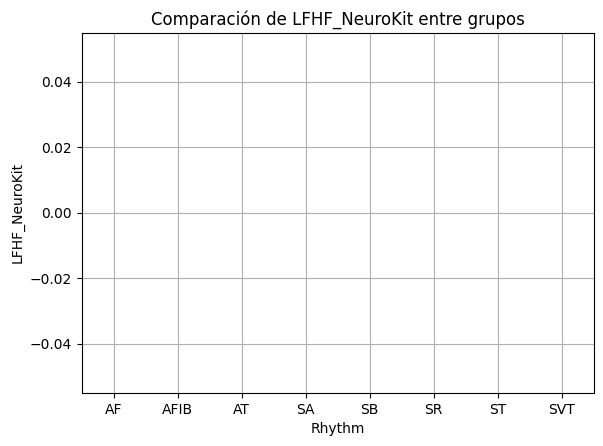

In [17]:
# Definir la característica a analizar
caracteristica = 'LFHF_NeuroKit'

# Calcular media y desviación estándar por grupo
resumen_lfhf = df.groupby('Rhythm')[caracteristica].agg(['mean', 'std'])
print("Resumen LFHF_NeuroKit por grupo:")
print(resumen_lfhf)

# Graficar
plt.figure(figsize=(8,5))
df.boxplot(column=caracteristica, by='Rhythm')
plt.title(f'Comparación de {caracteristica} entre grupos')
plt.suptitle('')
plt.xlabel('Rhythm')
plt.ylabel(caracteristica)
plt.grid(True)
plt.show()


Debido a que la mayoría de los datos de "LFHF_NeuroKit" están vacíos (NaN), no podemos realizar una comparación entre ellos, por lo que el gráfico sale en blanco.
Esto lo podemos comprobar con la siguiente línea de código
Con la función isna(), identificaremos los valores NaN en el archivo

In [21]:
CantidadNaN = df['LFHF_NeuroKit'].isna().sum()
CantidadconDatos = df['LFHF_NeuroKit'].count()

print("Hay: ", CantidadNaN, " datos vacíos de LFHF_Neutokit")
print("Hay: ", CantidadconDatos, " datos no vacíos de LFHF_Neutokit")



Hay:  7480  datos vacíos de LFHF_Neutokit
Hay:  0  datos no vacíos de LFHF_Neutokit


Lo anterior nos indica que el análisis lo realizaremos sólamente con SDNN y RMSSD.

## 2. Comparar esta característica entre los grupos usando pruebas de hipótesis y apoyándose en gráficos de estadística descriptiva.

Se decidió comparar sólamente algunos de los grupos para realizar las pruebas estadísticas, uno de ellos correspondientes a ritmo sinusal normal (SR) y fibrilación auricular (AFIB), debido a que, el ritmo sinusal (SR) representa el patrón eléctrico cardíaco normal, caracterizado por intervalos regulares entre latidos, por otro lado, AFIB es una de las arritmias más relevantes clínicamente, asociada a riesgos aumentados de accidente cerebrovascular e insuficiencia cardíaca. Lo que nos permitirá encontrar diferencias en la variabilidad de la frecuencia cardíaca (HRV) como SDNN y RMSSD.

Además, se realizaron análisis adicionales entre otros grupos clínicamente relevantes. Se seleccionó la comparación entre SR y SB porque ambos corresponden a ritmos de origen sinusal, pero con diferencias fisiológicas ya que el ritmo sinusal normal presenta una frecuencia cardíaca dentro de rangos típicos, la bradicardia sinusal (SB) se caracteriza por una frecuencia cardíaca anormalmente baja, lo cual podría influir en la variabilidad de la frecuencia cardíaca (HRV).

Por otro lado, se decidió comparar también ST y SVT debido a que ambos representan ritmos rápidos, aunque de diferente origen. ST corresponde a una taquicardia sinusal, generalmente benigna y adaptativa, mientras que SVT (taquicardia supraventricular) suele involucrar mecanismos patológicos de reentrada a nivel auricular o nodal. Esta comparación busca evaluar si las métricas de HRV son sensibles para distinguir entre taquicardias de diferente naturaleza.

Para realizar las pruebas estadísticas, primero filtramos los datos de SR y AFIB, luego probamos la normalidad con Shapiro-Wilk para cada grupo. Seguidamente, según el resultado, si es normal, usamos t-test, y si no es normal, usamos Mann–Whitney U test (no paramétrica).


### Código para comparar SDNN entre SR y AFIB usando pruebas estadísticas

In [37]:
import pandas as pd
import scipy.stats as stats

# 1. Filtrar datos de SR y AFIB para SDNN
grupo_SR_SDNN = df[df['Rhythm'] == 'SR']['SDNN'].dropna()
grupo_AFIB_SDNN = df[df['Rhythm'] == 'AFIB']['SDNN'].dropna()

# 2. Prueba de normalidad (Shapiro-Wilk)
print("Normalidad SDNN - SR:", stats.shapiro(grupo_SR_SDNN))
print("Normalidad SDNN - AFIB:", stats.shapiro(grupo_AFIB_SDNN))

# 3. Elegimos prueba: asumiremos que no hay normalidad (lo típico en HRV)
# Prueba Mann–Whitney U
print("\nPrueba de Mann–Whitney U - SDNN")
u_statistic_sdnn, p_value_sdnn = stats.mannwhitneyu(grupo_SR_SDNN, grupo_AFIB_SDNN, alternative='two-sided')
print("U statistic:", u_statistic_sdnn)
print("P-value:", p_value_sdnn)

# 4. Interpretación
if p_value_sdnn < 0.05:
    print("Conclusión: Hay diferencias estadísticamente significativas en SDNN entre SR y AFIB.")
else:
    print("Conclusión: No hay diferencias estadísticamente significativas en SDNN entre SR y AFIB.")


Normalidad SDNN - SR: ShapiroResult(statistic=np.float64(0.5143232748716621), pvalue=np.float64(2.1278037976251067e-37))
Normalidad SDNN - AFIB: ShapiroResult(statistic=np.float64(0.967166824417059), pvalue=np.float64(8.818379597857182e-12))

Prueba de Mann–Whitney U - SDNN
U statistic: 12004.5
P-value: 1.7511798538752282e-193
Conclusión: Hay diferencias estadísticamente significativas en SDNN entre SR y AFIB.


### Código para comparar SDNN entre SR y RMSSD usando pruebas estadísticas

In [38]:
# 1. Filtrar datos de SR y AFIB para RMSSD
grupo_SR_RMSSD = df[df['Rhythm'] == 'SR']['RMSSD'].dropna()
grupo_AFIB_RMSSD = df[df['Rhythm'] == 'AFIB']['RMSSD'].dropna()

# 2. Prueba de normalidad (Shapiro-Wilk)
print("Normalidad RMSSD - SR:", stats.shapiro(grupo_SR_RMSSD))
print("Normalidad RMSSD - AFIB:", stats.shapiro(grupo_AFIB_RMSSD))

# 3. Elegimos prueba: Mann–Whitney U
print("\nPrueba de Mann–Whitney U - RMSSD")
u_statistic_rmssd, p_value_rmssd = stats.mannwhitneyu(grupo_SR_RMSSD, grupo_AFIB_RMSSD, alternative='two-sided')
print("U statistic:", u_statistic_rmssd)
print("P-value:", p_value_rmssd)

# 4. Interpretación
if p_value_rmssd < 0.05:
    print("Conclusión: Hay diferencias estadísticamente significativas en RMSSD entre SR y AFIB.")
else:
    print("Conclusión: No hay diferencias estadísticamente significativas en RMSSD entre SR y AFIB.")


Normalidad RMSSD - SR: ShapiroResult(statistic=np.float64(0.4243392189816204), pvalue=np.float64(1.0039737923177312e-39))
Normalidad RMSSD - AFIB: ShapiroResult(statistic=np.float64(0.9648720875591413), pvalue=np.float64(2.7990381434057423e-12))

Prueba de Mann–Whitney U - RMSSD
U statistic: 11812.0
P-value: 7.701256153387372e-194
Conclusión: Hay diferencias estadísticamente significativas en RMSSD entre SR y AFIB.


Se realizó una prueba de normalidad mediante el test de Shapiro-Wilk para los grupos SR y AFIB, tanto en la variable SDNN como en RMSSD. Los resultados indicaron que en todos los casos los datos no siguen una distribución normal (p-valor < 0.05), por lo cual se optó por utilizar la prueba no paramétrica de Mann–Whitney U para comparar las medianas entre los grupos.

En la comparación de SDNN entre SR y AFIB, se obtuvo un p-valor menor a 0.05, indicando diferencias estadísticamente significativas entre ambos grupos. De manera similar, en la comparación de RMSSD se obtuvo un p-valor menor a 0.05, evidenciando también diferencias estadísticamente significativas.

Estos resultados sugieren que tanto la variabilidad global (SDNN) como la variabilidad a corto plazo (RMSSD) difieren significativamente entre individuos con ritmo sinusal normal y aquellos con fibrilación auricular, lo que refleja las alteraciones patológicas en la dinámica cardíaca asociadas a esta arritmia.

In [ ]:
# Comparación SR vs SB - SDNN
grupo_SR_SDNN = df[df['Rhythm'] == 'SR']['SDNN'].dropna()
grupo_SB_SDNN = df[df['Rhythm'] == 'SB']['SDNN'].dropna()

print("Normalidad SDNN - SR:", stats.shapiro(grupo_SR_SDNN))
print("Normalidad SDNN - SB:", stats.shapiro(grupo_SB_SDNN))

print("\nPrueba de Mann–Whitney U - SDNN SR vs SB")
u_statistic_sdnn, p_value_sdnn = stats.mannwhitneyu(grupo_SR_SDNN, grupo_SB_SDNN, alternative='two-sided')
print("U statistic:", u_statistic_sdnn)
print("P-value:", p_value_sdnn)

if p_value_sdnn < 0.05:
    print("Conclusión: Hay diferencias estadísticamente significativas en SDNN entre SR y SB.")
else:
    print("Conclusión: No hay diferencias estadísticamente significativas en SDNN entre SR y SB.")


# Comparación SR vs SB - RMSSD
grupo_SR_RMSSD = df[df['Rhythm'] == 'SR']['RMSSD'].dropna()
grupo_SB_RMSSD = df[df['Rhythm'] == 'SB']['RMSSD'].dropna()

print("\nNormalidad RMSSD - SR:", stats.shapiro(grupo_SR_RMSSD))
print("Normalidad RMSSD - SB:", stats.shapiro(grupo_SB_RMSSD))

print("\nPrueba de Mann–Whitney U - RMSSD SR vs SB")
u_statistic_rmssd, p_value_rmssd = stats.mannwhitneyu(grupo_SR_RMSSD, grupo_SB_RMSSD, alternative='two-sided')
print("U statistic:", u_statistic_rmssd)
print("P-value:", p_value_rmssd)

if p_value_rmssd < 0.05:
    print("Conclusión: Hay diferencias estadísticamente significativas en RMSSD entre SR y SB.")
else:
    print("Conclusión: No hay diferencias estadísticamente significativas en RMSSD entre SR y SB.")


Normalidad SDNN - SR: ShapiroResult(statistic=np.float64(0.5143232748716621), pvalue=np.float64(2.1278037976251067e-37))
Normalidad SDNN - SB: ShapiroResult(statistic=np.float64(0.9409122262305866), pvalue=np.float64(0.0024943350618115197))

Prueba de Mann–Whitney U - SDNN SR vs SB
U statistic: 483.0
P-value: 8.004085359949002e-41
Conclusión: Hay diferencias estadísticamente significativas en SDNN entre SR y SB.

Normalidad RMSSD - SR: ShapiroResult(statistic=np.float64(0.4243392189816204), pvalue=np.float64(1.0039737923177312e-39))
Normalidad RMSSD - SB: ShapiroResult(statistic=np.float64(0.9554961457771637), pvalue=np.float64(0.014212441889781668))

Prueba de Mann–Whitney U - RMSSD SR vs SB
U statistic: 269.0
P-value: 1.192956345432684e-41
Conclusión: Hay diferencias estadísticamente significativas en RMSSD entre SR y SB.


Al realziar la prueba de normalidad (Shapiro-Wilk) para los grupos SR y SB tanto en SDNN como en RMSSD, vimos que los datos no siguen una distribución normal, pues tienen un p-valor < 0.05 en ambos casos, mostrando en ambos casos que tienen diferencias estadísticamente significativas entre SR y SB, por lo cual se aplicó la prueba no paramétrica de Mann–Whitney U. 

Además del hallazgo de diferencias estadísticamente significativas (p < 0.05), los valores de mediana de SDNN y RMSSD fueron considerablemente mayores en el grupo de bradicardia sinusal (SB) en comparación con el ritmo sinusal normal (SR), lo qeu nos indica que tiene una mayor variabilidad de la frecuencia cardíaca en pacientes con bradicardia.

In [ ]:
# Comparación ST vs SVT - SDNN
grupo_ST_SDNN = df[df['Rhythm'] == 'ST']['SDNN'].dropna()
grupo_SVT_SDNN = df[df['Rhythm'] == 'SVT']['SDNN'].dropna()

print("\nNormalidad SDNN - ST:", stats.shapiro(grupo_ST_SDNN))
print("Normalidad SDNN - SVT:", stats.shapiro(grupo_SVT_SDNN))

print("\nPrueba de Mann–Whitney U - SDNN ST vs SVT")
u_statistic_sdnn, p_value_sdnn = stats.mannwhitneyu(grupo_ST_SDNN, grupo_SVT_SDNN, alternative='two-sided')
print("U statistic:", u_statistic_sdnn)
print("P-value:", p_value_sdnn)

if p_value_sdnn < 0.05:
    print("Conclusión: Hay diferencias estadísticamente significativas en SDNN entre ST y SVT.")
else:
    print("Conclusión: No hay diferencias estadísticamente significativas en SDNN entre ST y SVT.")


# Comparación ST vs SVT - RMSSD
grupo_ST_RMSSD = df[df['Rhythm'] == 'ST']['RMSSD'].dropna()
grupo_SVT_RMSSD = df[df['Rhythm'] == 'SVT']['RMSSD'].dropna()

print("\nNormalidad RMSSD - ST:", stats.shapiro(grupo_ST_RMSSD))
print("Normalidad RMSSD - SVT:", stats.shapiro(grupo_SVT_RMSSD))

print("\nPrueba de Mann–Whitney U - RMSSD ST vs SVT")
u_statistic_rmssd, p_value_rmssd = stats.mannwhitneyu(grupo_ST_RMSSD, grupo_SVT_RMSSD, alternative='two-sided')
print("U statistic:", u_statistic_rmssd)
print("P-value:", p_value_rmssd)

if p_value_rmssd < 0.05:
    print("Conclusión: Hay diferencias estadísticamente significativas en RMSSD entre ST y SVT.")
else:
    print("Conclusión: No hay diferencias estadísticamente significativas en RMSSD entre ST y SVT.")



Normalidad SDNN - ST: ShapiroResult(statistic=np.float64(0.4272750034475158), pvalue=np.float64(4.447044414093937e-53))
Normalidad SDNN - SVT: ShapiroResult(statistic=np.float64(0.309074470587951), pvalue=np.float64(2.0605042991506674e-37))

Prueba de Mann–Whitney U - SDNN ST vs SVT
U statistic: 419251.5
P-value: 4.433632070529688e-55
Conclusión: Hay diferencias estadísticamente significativas en SDNN entre ST y SVT.

Normalidad RMSSD - ST: ShapiroResult(statistic=np.float64(0.36939367571196224), pvalue=np.float64(1.0711612341135438e-54))
Normalidad RMSSD - SVT: ShapiroResult(statistic=np.float64(0.2664182604078328), pvalue=np.float64(3.262417173361222e-38))

Prueba de Mann–Whitney U - RMSSD ST vs SVT
U statistic: 401383.5
P-value: 2.527484631471987e-42
Conclusión: Hay diferencias estadísticamente significativas en RMSSD entre ST y SVT.


Para los grupos ST y SVT, también se evaluó la normalidad mediante la prueba de Shapiro-Wilk, confirmando la ausencia de distribución normal en las variables analizadas. En consecuencia, se utilizó nuevamente la prueba de Mann–Whitney U para la comparación ya que en ambos caso se encontró que el p-valor era menor a 0.05.Aunque ST y SVT son ritmos cardiacos rápidos, se encuentra que hay diferencias en la variabilidad de la frecuencia cardiaca.

## 3. ¿Qué características logra mejor discriminación entre grupos? Consultar describir el algoritmo paso a paso de cálculo de dicha característica


Ambas variables (SDNN y RMSSD) mostraron diferencias estadísticamente significativas, pues ambas tienen un p-valor bastante pequeño, mucho menor que 0.05 en todas las comparaciones realizadas (SR vs AFIB, SR vs SB, ST vs SVT). Sin embargo, la característica SDNN mostró diferencias mayores en el gráfico de cajas y bigotes, por tanto, la característica que logra mejor discriminación entre grupos es el SDNN. Ésta carácterística mide la variabilidad total de la frecuencia cardiaca


#### Para calcular el valor de SDNN a partir de una señal de ECG, se siguen los siguientes pasos: 
1. Detección de picos R: Se identifican los latidos del corazón localizando los máximos de los complejos QRS en la señal de ECG.    Debido a que la HVR (Variabilidad de la frecuencia cardiaca), depende de los lalidos del corazón, por lo cual es últil detectar la frecuencia en la que se detectan esos picos R

2. Cálculo de intervalos RR: Se mide el tiempo entre cada par de picos consecutivos R.

3. Obtención de la serie de intervalos RR: Construir una lista de todos los intervalos RR obtenidos en el registro. Esta lista representaría la variación latido a latido.

4. Cálculo de la media de intervalos: Para esto, se suman todos los intervalos RR y se dividen entre el número total de intervalos, obteniendo el valor promedio.

5. Cálculo de la desviación estándar de los intervalos RR: Para cada intervalo, se calcula su diferencia respecto a la media, se eleva al cuadrado cada diferencia, se obtiene el promedio de estos cuadrados, y finalmente se extrae la raíz cuadrada del promedio. Ésto nos brindará la medida de dispersión de la serie RR, o sea, la SDNN.

6. Reporte del SDNN: El valor final de SDNN se reporta en milisegundos (ms) y refleja la variabilidad global del ritmo cardíaco durante el registro.